# ED-TECH LEAD SCORING
###### Anjani Kumar M

In [1]:
# Modules/libraries required 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

## 1. Data Preparation
### 1.1 Read data

In [2]:
#Read the input data (in .csv format) into 'leads' dataframe
leads = pd.read_csv(r'Leads.csv')

In [3]:
leads.shape

(9240, 37)

In [4]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
leads_dtypes = leads.columns.to_series().groupby(leads.dtypes).groups
leads_dtypes

{dtype('int64'): Index(['Lead Number', 'Converted', 'Total Time Spent on Website'], dtype='object'),
 dtype('float64'): Index(['TotalVisits', 'Page Views Per Visit', 'Asymmetrique Activity Score',
        'Asymmetrique Profile Score'],
       dtype='object'),
 dtype('O'): Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
        'Do Not Call', 'Last Activity', 'Country', 'Specialization',
        'How did you hear about X Education', 'What is your current occupation',
        'What matters most to you in choosing a course', 'Search', 'Magazine',
        'Newspaper Article', 'X Education Forums', 'Newspaper',
        'Digital Advertisement', 'Through Recommendations',
        'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
        'Update me on Supply Chain Content', 'Get updates on DM Content',
        'Lead Profile', 'City', 'Asymmetrique Activity Index',
        'Asymmetrique Profile Index',
        'I agree to pay the amount through cheque',
     

In [6]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [7]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [8]:
round(leads.isnull().mean()*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

### 1.2 NA/Null Handling

In [9]:
# Removing the columns with nulls > 30% of NAs

emptycol = leads.isnull().sum()/len(leads)
emptycol = list(emptycol[emptycol.values>=0.3].index)
leads.drop(labels=emptycol,axis=1,inplace=True)
print(len(emptycol))

6


In [10]:
leads.shape

(9240, 31)

In [11]:
# Removing rows having null values greater than or equal to 30%

emptyrow=leads.isnull().sum(axis=1)
emptyrow=list(emptyrow[emptyrow.values>=0.3*len(leads)].index)
leads.drop(labels=emptyrow,axis=0,inplace=True)
print(len(emptyrow))

0


In [12]:
leads.shape

(9240, 31)

In [13]:
round(leads.isnull().mean()*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [14]:
# Need to do NA processing for columns 

# 1.  Lead Source - .39%
# 2.  TotalVisits - 1.48%
# 3.  Page Views Per Visit - 1.48%
# 4.  Last Activity - 1.11%
# 5.  Country - 26.63%
# 6.  Specialization - 15.56%
# 7.  How did you hear about X Education - 23.89%
# 8.  What is your current occupation - 29.11%
# 9.  What matters most to you in choosing a course - 29.32%
# 10. Lead Profile - 29.32%
# 11. City - 15.37%

In [15]:
leads.shape

(9240, 31)

In [16]:
# Dropping the columns - Prespect ID because there is an unique key column, Lead Number

In [17]:
leads  = leads.drop( ['Prospect ID'], axis=1 )

In [18]:
leads.shape

(9240, 30)

In [19]:
# Dropping records from the below columns as they have neglible NAs < 1.5%

In [20]:
leads = leads.dropna(subset=['Lead Source', 'TotalVisits','Page Views Per Visit','Last Activity'])

In [21]:
leads.shape

(9074, 30)

In [22]:
# That leaves us with below columns to handle the NAs

# 1. Country - 26.63%
# 2. Specialization - 15.56%
# 3. How did you hear about X Education - 23.89%
# 4. What is your current occupation - 29.11%
# 5. What matters most to you in choosing a course - 29.32%
# 6. Lead Profile - 29.32%
# 7. City - 15.37%

In [23]:
# Remove or impute: Check this 
round(leads['Country'].value_counts(normalize=True)*100,2)

India                   95.77
United States            1.02
United Arab Emirates     0.78
Singapore                0.35
Saudi Arabia             0.31
United Kingdom           0.22
Australia                0.19
Qatar                    0.15
Bahrain                  0.10
Hong Kong                0.10
Oman                     0.09
France                   0.09
unknown                  0.07
Nigeria                  0.06
Canada                   0.06
Germany                  0.06
South Africa             0.06
Kuwait                   0.06
Sweden                   0.04
Ghana                    0.03
Italy                    0.03
Bangladesh               0.03
Asia/Pacific Region      0.03
Philippines              0.03
China                    0.03
Belgium                  0.03
Uganda                   0.03
Netherlands              0.03
Denmark                  0.01
Vietnam                  0.01
Kenya                    0.01
Russia                   0.01
Tanzania                 0.01
Switzerlan

In [24]:
# Due to Country column skewed nature, dropping it
leads  = leads.drop( ['Country'], axis=1 )

In [25]:
# Remove or impute: Check this 
round(leads['Specialization'].value_counts(normalize=True)*100,2)

Select                               24.22
Finance Management                   12.55
Human Resource Management            10.95
Marketing Management                 10.77
Operations Management                 6.53
Business Administration               5.22
IT Projects Management                4.79
Supply Chain Management               4.53
Banking, Investment And Insurance     4.38
Media and Advertising                 2.64
Travel and Tourism                    2.64
International Business                2.30
Healthcare Management                 2.04
E-COMMERCE                            1.45
Hospitality Management                1.45
Retail Management                     1.31
Rural and Agribusiness                0.96
E-Business                            0.75
Services Excellence                   0.52
Name: Specialization, dtype: float64

In [26]:
# Imputing NAs in column 'Specialization' with "Select" as it has highest occurances in the Leads dataset

leads["Specialization"].fillna("Select", inplace = True) 
round(leads['Specialization'].value_counts(normalize=True)*100,2)

Select                               36.17
Finance Management                   10.57
Human Resource Management             9.22
Marketing Management                  9.07
Operations Management                 5.50
Business Administration               4.40
IT Projects Management                4.03
Supply Chain Management               3.81
Banking, Investment And Insurance     3.69
Media and Advertising                 2.23
Travel and Tourism                    2.23
International Business                1.94
Healthcare Management                 1.72
E-COMMERCE                            1.22
Hospitality Management                1.22
Retail Management                     1.10
Rural and Agribusiness                0.80
E-Business                            0.63
Services Excellence                   0.44
Name: Specialization, dtype: float64

In [27]:
# Remove or impute: Check this 
round(leads['How did you hear about X Education'].value_counts(normalize=True)*100,2)

Select                   71.08
Online Search            11.75
Word Of Mouth             5.05
Student of SomeSchool     4.51
Other                     2.71
Multiple Sources          2.21
Advertisements            1.02
Social Media              0.96
Email                     0.38
SMS                       0.33
Name: How did you hear about X Education, dtype: float64

In [28]:
# This might have been a non-mandatory column in the lead application form/survey
# and hence "Select" the default option was selected. 

# Imputing NAs in column 'How did you hear about X Education' with "Select" as it has highest occurances 
#  the Leads dataset

leads["How did you hear about X Education"].fillna("Select", inplace = True) 
round(leads['How did you hear about X Education'].value_counts(normalize=True)*100,2)

Select                   78.09
Online Search             8.90
Word Of Mouth             3.82
Student of SomeSchool     3.42
Other                     2.05
Multiple Sources          1.68
Advertisements            0.77
Social Media              0.73
Email                     0.29
SMS                       0.25
Name: How did you hear about X Education, dtype: float64

In [29]:

# Remove or impute: Check this 
round(leads['What is your current occupation'].value_counts(normalize=True)*100,2)

Unemployed              85.68
Working Professional    10.59
Student                  3.22
Other                    0.23
Housewife                0.14
Businessman              0.13
Name: What is your current occupation, dtype: float64

In [30]:
# Imputing NAs in column 'Current occupation' with "Unemployed" as it has highest occurances in the Leads dataset

leads["What is your current occupation"].fillna("Unemployed", inplace = True) 
round(leads['What is your current occupation'].value_counts(normalize=True)*100,2)

Unemployed              89.92
Working Professional     7.46
Student                  2.27
Other                    0.17
Housewife                0.10
Businessman              0.09
Name: What is your current occupation, dtype: float64

In [31]:
round(leads['What matters most to you in choosing a course'].value_counts(normalize=True)*100,2)
# The career prospects was a huge driver for leads at >99%. Using this field might introduce bias in the model

Better Career Prospects      99.97
Other                         0.02
Flexibility & Convenience     0.02
Name: What matters most to you in choosing a course, dtype: float64

In [32]:
# Due to "What matters most to you in choosing a course" column skewed nature, dropping it
leads  = leads.drop( ['What matters most to you in choosing a course'], axis=1 )

In [33]:
# Remove or impute: Check this 
round(leads['Lead Profile'].value_counts(normalize=True)*100,2)

Select                         63.64
Potential Lead                 24.39
Other Leads                     7.56
Student of SomeSchool           3.77
Lateral Student                 0.33
Dual Specialization Student     0.31
Name: Lead Profile, dtype: float64

In [34]:
# Imputing NAs in column 'Lead Profile' with "Select" as it has highest occurances in the Leads dataset

leads["Lead Profile"].fillna("Select", inplace = True) 
round(leads['Lead Profile'].value_counts(normalize=True)*100,2)

Select                         74.47
Potential Lead                 17.13
Other Leads                     5.31
Student of SomeSchool           2.64
Lateral Student                 0.23
Dual Specialization Student     0.22
Name: Lead Profile, dtype: float64

In [35]:

# Remove or impute: Check this 
round(leads['City'].value_counts(normalize=True)*100,2)

Mumbai                         41.50
Select                         28.16
Thane & Outskirts               9.73
Other Cities                    8.88
Other Cities of Maharashtra     5.83
Other Metro Cities              4.92
Tier II Cities                  0.97
Name: City, dtype: float64

In [36]:
# Imputing NAs in column 'City' with "Mumbai" as it has highest occurances in the Leads dataset

leads["City"].fillna("Mumbai", inplace = True) 
round(leads['City'].value_counts(normalize=True)*100,2)

Mumbai                         50.65
Select                         23.76
Thane & Outskirts               8.21
Other Cities                    7.49
Other Cities of Maharashtra     4.92
Other Metro Cities              4.15
Tier II Cities                  0.82
Name: City, dtype: float64

In [37]:
round(leads.isnull().mean()*100,2)

Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Specialization                              0.0
How did you hear about X Education          0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses  

In [38]:
leads.shape

(9074, 28)

### 1.3 EDA (Univariate Analysis/Handling Skewedness in data/Outlier Treatment)

In [39]:
round(leads['Do Not Call'].value_counts(normalize=True)*100,2)

No     99.98
Yes     0.02
Name: Do Not Call, dtype: float64

In [40]:
round(leads['Lead Source'].value_counts(normalize=True)*100,2)

Google               31.61
Direct Traffic       28.03
Olark Chat           19.32
Organic Search       12.72
Reference             4.88
Welingak Website      1.42
Referral Sites        1.38
Facebook              0.34
bing                  0.07
google                0.06
Click2call            0.04
Live Chat             0.02
Press_Release         0.02
Social Media          0.02
Pay per Click Ads     0.01
welearnblog_Home      0.01
WeLearn               0.01
blog                  0.01
NC_EDM                0.01
youtubechannel        0.01
testone               0.01
Name: Lead Source, dtype: float64

In [41]:
leads['Lead Source'] = leads['Lead Source'].replace([
"Welingak Website",
"Referral Sites",
"Facebook",
"bing",
"google",
"Click2call",
"Live Chat",
"Press_Release",
"Social Media",
"testone",
"blog",
"youtubechannel",
"WeLearn",
"Pay per Click Ads",
"NC_EDM",
"welearnblog_Home"
],'Others')

In [42]:
round(leads['Do Not Email'].value_counts(normalize=True)*100,2)

No     92.11
Yes     7.89
Name: Do Not Email, dtype: float64

In [43]:
round(leads['Search'].value_counts(normalize=True)*100,2)

No     99.85
Yes     0.15
Name: Search, dtype: float64

In [44]:
round(leads['Magazine'].value_counts(normalize=True)*100,2)

No    100.0
Name: Magazine, dtype: float64

In [45]:
round(leads['X Education Forums'].value_counts(normalize=True)*100,2)

No     99.99
Yes     0.01
Name: X Education Forums, dtype: float64

In [46]:
round(leads['Newspaper'].value_counts(normalize=True)*100,2)

No     99.99
Yes     0.01
Name: Newspaper, dtype: float64

In [47]:
round(leads['Digital Advertisement'].value_counts(normalize=True)*100,2)

No     99.96
Yes     0.04
Name: Digital Advertisement, dtype: float64

In [48]:
round(leads['Through Recommendations'].value_counts(normalize=True)*100,2)

No     99.92
Yes     0.08
Name: Through Recommendations, dtype: float64

In [49]:
round(leads['Receive More Updates About Our Courses'].value_counts(normalize=True)*100,2)

No    100.0
Name: Receive More Updates About Our Courses, dtype: float64

In [50]:
round(leads['Update me on Supply Chain Content'].value_counts(normalize=True)*100,2)

No    100.0
Name: Update me on Supply Chain Content, dtype: float64

In [51]:
round(leads['Get updates on DM Content'].value_counts(normalize=True)*100,2)

No    100.0
Name: Get updates on DM Content, dtype: float64

In [52]:
round(leads['Newspaper Article'].value_counts(normalize=True)*100,2)

No     99.98
Yes     0.02
Name: Newspaper Article, dtype: float64

In [53]:
round(leads['I agree to pay the amount through cheque'].value_counts(normalize=True)*100,2)

No    100.0
Name: I agree to pay the amount through cheque, dtype: float64

In [54]:
round(leads['A free copy of Mastering The Interview'].value_counts(normalize=True)*100,2)

No     68.17
Yes    31.83
Name: A free copy of Mastering The Interview, dtype: float64

In [55]:
round(leads['Last Activity'].value_counts(normalize=True)*100,2)

Email Opened                    37.82
SMS Sent                        29.93
Olark Chat Conversation         10.71
Page Visited on Website          7.05
Converted to Lead                4.72
Email Bounced                    3.44
Email Link Clicked               2.94
Form Submitted on Website        1.28
Unreachable                      0.99
Unsubscribed                     0.65
Had a Phone Conversation         0.28
View in browser link Clicked     0.07
Approached upfront               0.06
Email Received                   0.02
Email Marked Spam                0.02
Visited Booth in Tradeshow       0.01
Resubscribed to emails           0.01
Name: Last Activity, dtype: float64

In [56]:
round(leads['Last Notable Activity'].value_counts(normalize=True)*100,2)

Modified                        36.00
Email Opened                    31.11
SMS Sent                        23.72
Page Visited on Website          3.50
Olark Chat Conversation          2.02
Email Link Clicked               1.91
Email Bounced                    0.66
Unsubscribed                     0.50
Unreachable                      0.35
Had a Phone Conversation         0.15
Email Marked Spam                0.02
Resubscribed to emails           0.01
Email Received                   0.01
Form Submitted on Website        0.01
Approached upfront               0.01
View in browser link Clicked     0.01
Name: Last Notable Activity, dtype: float64

In [57]:
leads['Last Notable Activity'] = leads['Last Notable Activity'].replace([
"Email Bounced",
"Unsubscribed",
"Unreachable",
"Had a Phone Conversation",
"Email Marked Spam",
"Email Received",
"View in browser link Clicked",
"Approached upfront",
"Resubscribed to emails",
"Form Submitted on Website"
],'Others')

In [58]:
# Deleting the columns where a single value has > 80% of values - Skewedness 
# 'Last Activity' as well due to redudancy 

In [59]:
leads  = leads.drop( [ "Do Not Call", "Do Not Email",
"Search", "Magazine",
"X Education Forums", "Newspaper",
"Digital Advertisement", "Through Recommendations", "Receive More Updates About Our Courses",
"Get updates on DM Content", "Update me on Supply Chain Content",
"I agree to pay the amount through cheque", "Newspaper Article", 
"What is your current occupation", "How did you hear about X Education", 
"Last Activity", "A free copy of Mastering The Interview", "Lead Profile" ] ,axis=1)

In [60]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Lead Number                  9074 non-null   int64  
 1   Lead Origin                  9074 non-null   object 
 2   Lead Source                  9074 non-null   object 
 3   Converted                    9074 non-null   int64  
 4   TotalVisits                  9074 non-null   float64
 5   Total Time Spent on Website  9074 non-null   int64  
 6   Page Views Per Visit         9074 non-null   float64
 7   Specialization               9074 non-null   object 
 8   City                         9074 non-null   object 
 9   Last Notable Activity        9074 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 779.8+ KB


In [61]:
leads.shape

(9074, 10)

In [62]:
leads.head()

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,City,Last Notable Activity
0,660737,API,Olark Chat,0,0.0,0,0.0,Select,Select,Modified
1,660728,API,Organic Search,0,5.0,674,2.5,Select,Select,Email Opened
2,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Business Administration,Mumbai,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Media and Advertising,Mumbai,Modified
4,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Select,Mumbai,Modified


In [63]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000
mean,617032.619352,0.378554,3.456028,482.887481,2.370151
std,23348.029512,0.485053,4.858802,545.256560,2.160871
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596406.000000,0.000000,1.000000,11.000000,1.000000
50%,615278.500000,0.000000,3.000000,246.000000,2.000000
75%,637176.500000,1.000000,5.000000,922.750000,3.200000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000


#### Outlier Treatment of numeric variables

In [64]:
#Removing outliers for TotalVisits
Q1 = leads['TotalVisits'].quantile(0.05)
Q3 = leads['TotalVisits'].quantile(0.95)
IQR = Q3 - Q1
leads = leads[(leads['TotalVisits'] >= Q1 - 1.5*IQR) & (leads['TotalVisits'] <= Q3 + 1.5*IQR)]

In [65]:
#Removing outliers for Total Time Spent on Website
Q1 = leads['Total Time Spent on Website'].quantile(0.05)
Q3 = leads['Total Time Spent on Website'].quantile(0.95)
IQR = Q3 - Q1
leads = leads[(leads['Total Time Spent on Website'] >= Q1 - 1.5*IQR) & (leads['Total Time Spent on Website'] <= Q3 + 1.5*IQR)]

In [66]:
#Removing outliers for Page Views Per Visit
Q1 = leads['Page Views Per Visit'].quantile(0.05)
Q3 = leads['Page Views Per Visit'].quantile(0.95)
IQR = Q3 - Q1
leads = leads[(leads['Page Views Per Visit'] >= Q1 - 1.5*IQR) & (leads['Page Views Per Visit'] <= Q3 + 1.5*IQR)]

### 1.4 Dummy Values Creation

In [67]:
leads_dtypes = leads.columns.to_series().groupby(leads.dtypes).groups
leads_dtypes

{dtype('int64'): Index(['Lead Number', 'Converted', 'Total Time Spent on Website'], dtype='object'),
 dtype('float64'): Index(['TotalVisits', 'Page Views Per Visit'], dtype='object'),
 dtype('O'): Index(['Lead Origin', 'Lead Source', 'Specialization', 'City',
        'Last Notable Activity'],
       dtype='object')}

In [68]:
ls_df = pd.get_dummies(leads["Lead Source"], prefix='Lead Source', drop_first=True)

# Adding the results to the master dataframe
leads = pd.concat([leads, ls_df], axis=1)
leads.head()

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,City,Last Notable Activity,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference
0,660737,API,Olark Chat,0,0.0,0,0.0,Select,Select,Modified,0,1,0,0,0
1,660728,API,Organic Search,0,5.0,674,2.5,Select,Select,Email Opened,0,0,1,0,0
2,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Business Administration,Mumbai,Email Opened,0,0,0,0,0
3,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Media and Advertising,Mumbai,Modified,0,0,0,0,0
4,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Select,Mumbai,Modified,1,0,0,0,0


In [69]:
sp_df = pd.get_dummies(leads["Specialization"], prefix='Specialization', drop_first=True)

# Adding the results to the master dataframe
leads = pd.concat([leads, sp_df], axis=1)
leads.head()

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,City,Last Notable Activity,...,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,660737,API,Olark Chat,0,0.0,0,0.0,Select,Select,Modified,...,0,0,0,0,0,0,1,0,0,0
1,660728,API,Organic Search,0,5.0,674,2.5,Select,Select,Email Opened,...,0,0,0,0,0,0,1,0,0,0
2,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Business Administration,Mumbai,Email Opened,...,0,0,0,0,0,0,0,0,0,0
3,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Media and Advertising,Mumbai,Modified,...,0,0,1,0,0,0,0,0,0,0
4,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Select,Mumbai,Modified,...,0,0,0,0,0,0,1,0,0,0


In [70]:
c_df = pd.get_dummies(leads["City"], prefix='City', drop_first=True)

# Adding the results to the master dataframe
leads = pd.concat([leads, c_df], axis=1)
leads.head()

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,City,Last Notable Activity,...,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Select,City_Thane & Outskirts,City_Tier II Cities
0,660737,API,Olark Chat,0,0.0,0,0.0,Select,Select,Modified,...,1,0,0,0,0,0,0,1,0,0
1,660728,API,Organic Search,0,5.0,674,2.5,Select,Select,Email Opened,...,1,0,0,0,0,0,0,1,0,0
2,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Business Administration,Mumbai,Email Opened,...,0,0,0,0,0,0,0,0,0,0
3,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Media and Advertising,Mumbai,Modified,...,0,0,0,0,0,0,0,0,0,0
4,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Select,Mumbai,Modified,...,1,0,0,0,0,0,0,0,0,0


In [71]:
lo_df = pd.get_dummies(leads["Lead Origin"], prefix='Lead Origin', drop_first=True)

# Adding the results to the master dataframe
leads = pd.concat([leads, lo_df], axis=1)
leads.head()

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,City,Last Notable Activity,...,Specialization_Travel and Tourism,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Select,City_Thane & Outskirts,City_Tier II Cities,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import
0,660737,API,Olark Chat,0,0.0,0,0.0,Select,Select,Modified,...,0,0,0,0,1,0,0,0,0,0
1,660728,API,Organic Search,0,5.0,674,2.5,Select,Select,Email Opened,...,0,0,0,0,1,0,0,0,0,0
2,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Business Administration,Mumbai,Email Opened,...,0,0,0,0,0,0,0,1,0,0
3,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Media and Advertising,Mumbai,Modified,...,0,0,0,0,0,0,0,1,0,0
4,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Select,Mumbai,Modified,...,0,0,0,0,0,0,0,1,0,0


In [72]:
lna_df = pd.get_dummies(leads["Last Notable Activity"],  prefix='Last Notable Activity', drop_first=True)

# Adding the results to the master dataframe
leads = pd.concat([leads, lna_df], axis=1)
leads.head()

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,City,Last Notable Activity,...,City_Tier II Cities,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,660737,API,Olark Chat,0,0.0,0,0.0,Select,Select,Modified,...,0,0,0,0,0,1,0,0,0,0
1,660728,API,Organic Search,0,5.0,674,2.5,Select,Select,Email Opened,...,0,0,0,0,1,0,0,0,0,0
2,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Business Administration,Mumbai,Email Opened,...,0,1,0,0,1,0,0,0,0,0
3,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Media and Advertising,Mumbai,Modified,...,0,1,0,0,0,1,0,0,0,0
4,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Select,Mumbai,Modified,...,0,1,0,0,0,1,0,0,0,0


In [73]:
# We have created dummies for the below variables, so we can drop them
leads = leads.drop( ['Lead Source', 'Lead Origin','Specialization', 'City','Last Notable Activity']   
, axis=1)
leads.head()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,...,City_Tier II Cities,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,660737,0,0.0,0,0.0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,660728,0,5.0,674,2.5,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,660727,1,2.0,1532,2.0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
3,660719,0,1.0,305,1.0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
4,660681,1,2.0,1428,1.0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [74]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9048 entries, 0 to 9239
Data columns (total 43 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Number                                    9048 non-null   int64  
 1   Converted                                      9048 non-null   int64  
 2   TotalVisits                                    9048 non-null   float64
 3   Total Time Spent on Website                    9048 non-null   int64  
 4   Page Views Per Visit                           9048 non-null   float64
 5   Lead Source_Google                             9048 non-null   uint8  
 6   Lead Source_Olark Chat                         9048 non-null   uint8  
 7   Lead Source_Organic Search                     9048 non-null   uint8  
 8   Lead Source_Others                             9048 non-null   uint8  
 9   Lead Source_Reference                          9048 

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
# Putting feature variable to X
X = leads.drop(['Lead Number', 'Converted'], axis=1)

X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Specialization_Business Administration,Specialization_E-Business,...,City_Tier II Cities,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0.0,0,0.0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,5.0,674,2.5,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,2.0,1532,2.0,0,0,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
3,1.0,305,1.0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [77]:
# Putting response variable to y
y = leads['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [78]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### 1.5 Correlation Plot

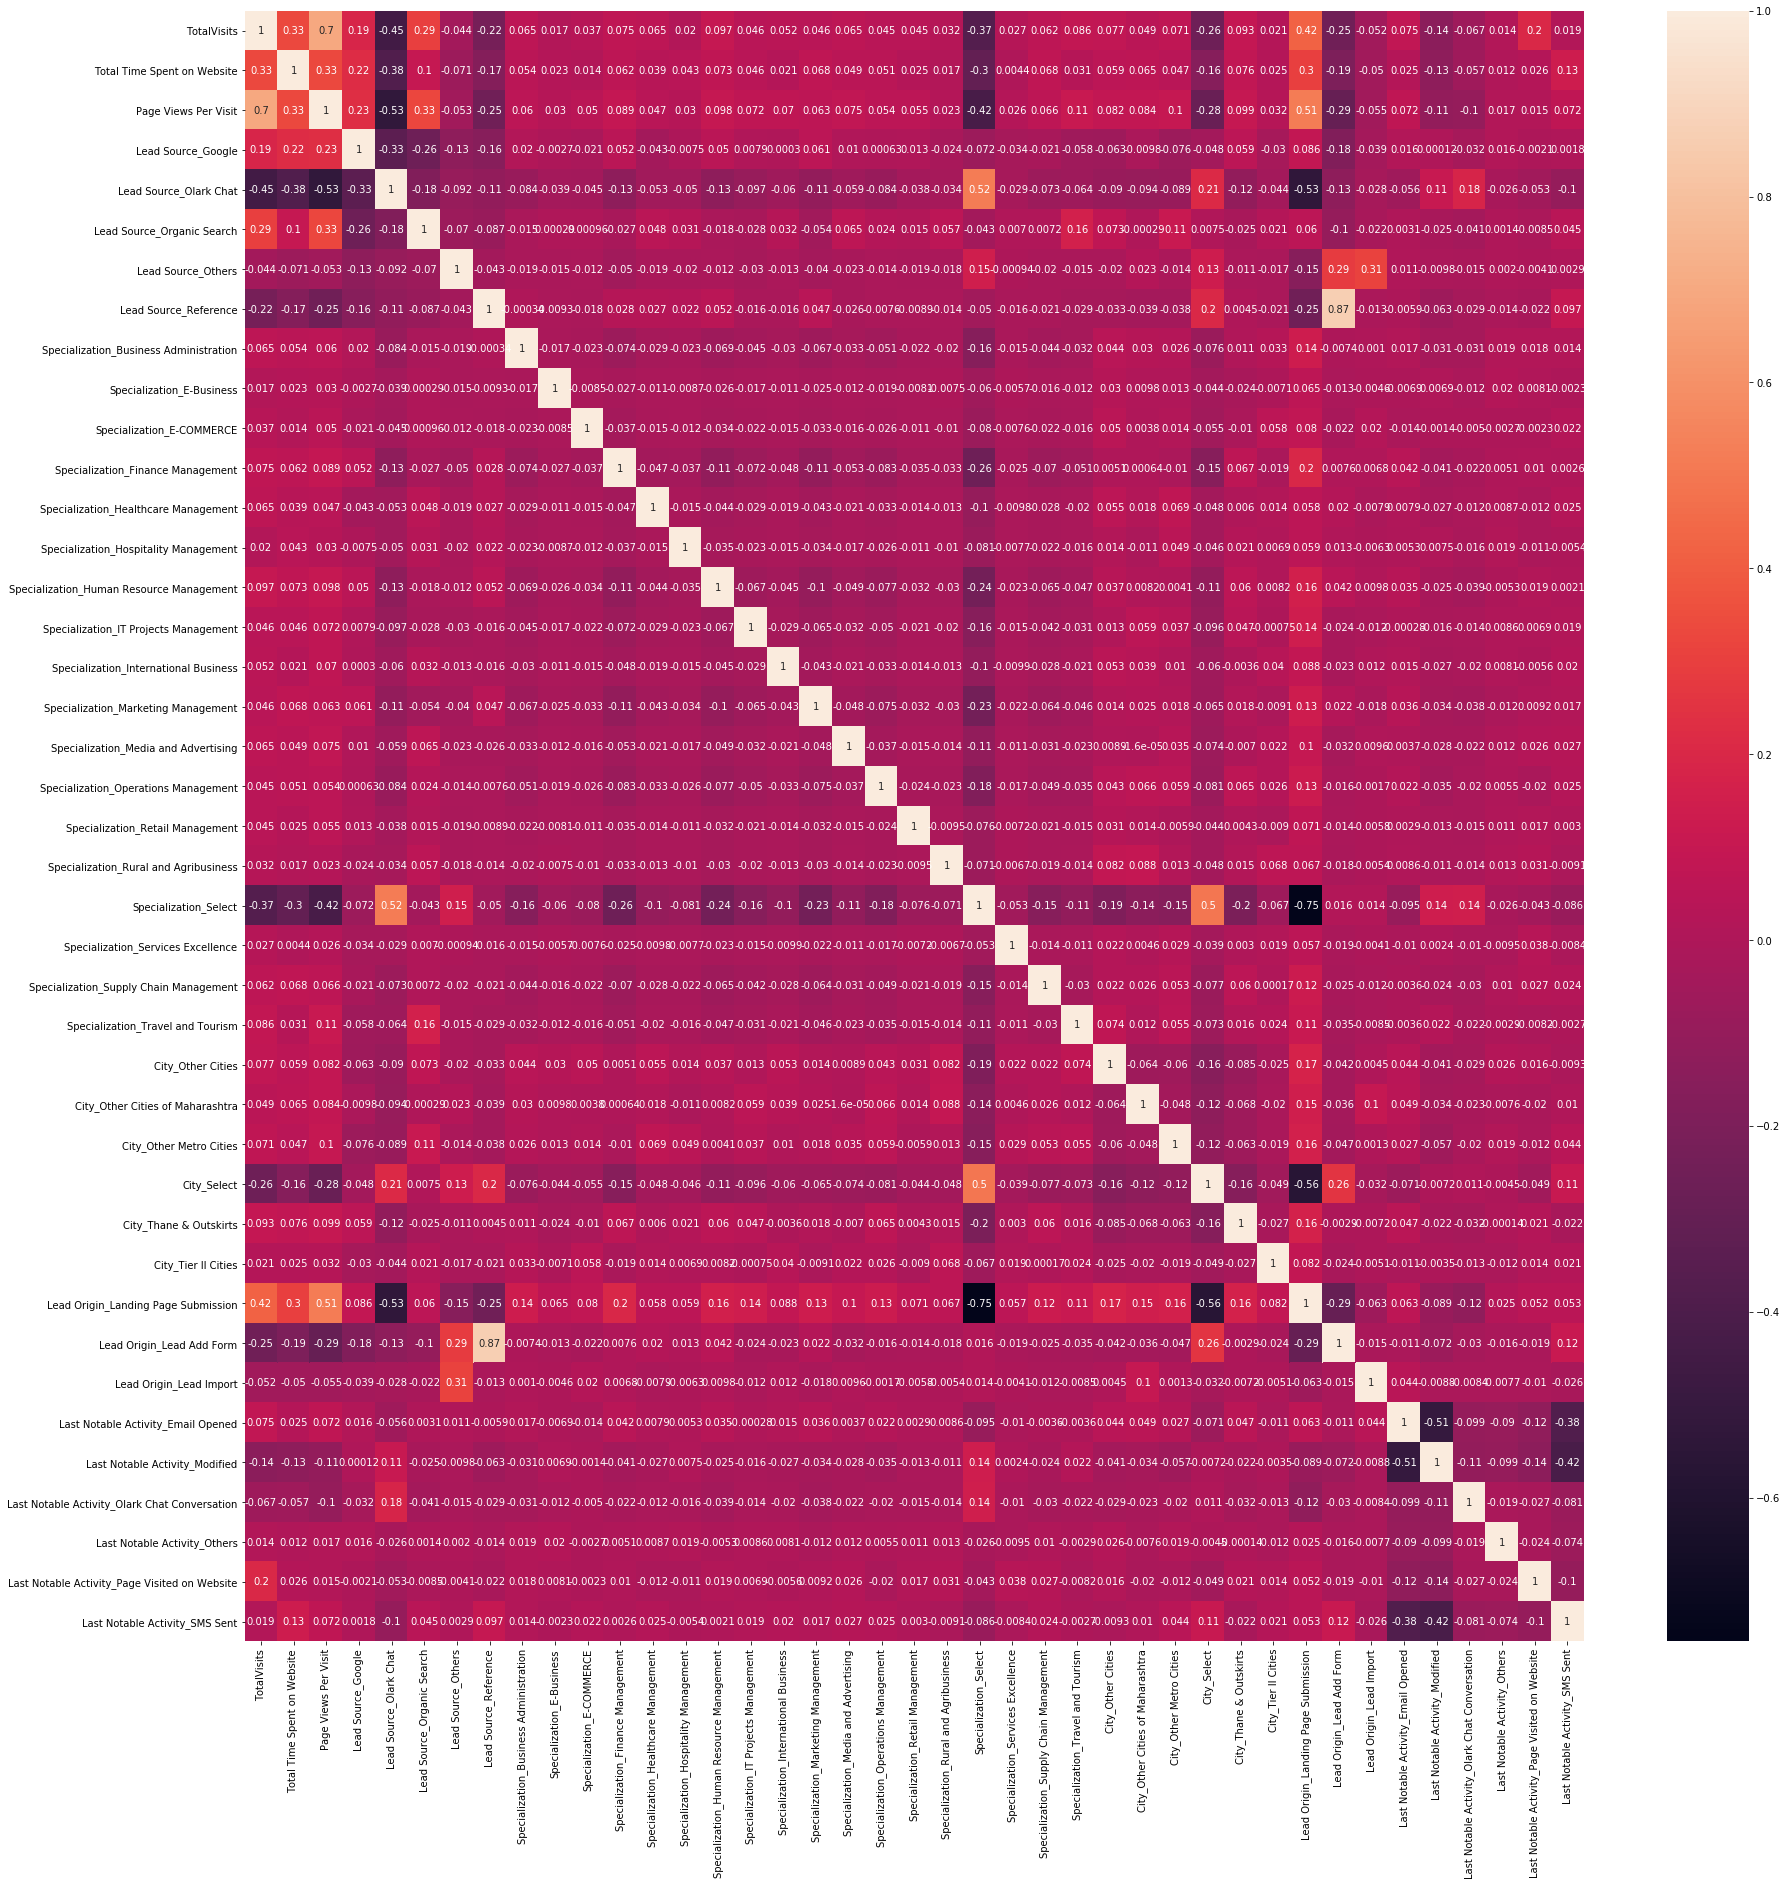

In [79]:
plt.figure(figsize = (30,30))
sns.heatmap(X_train.corr(), annot = True)
plt.show()

In [80]:
#'Page Views Per Visit' has 0.7 strong correlation with 'Total Views'
X_test = X_test.drop(['Page Views Per Visit', 'Specialization_Select',
'Lead Origin_Lead Add Form'], 1)

In [81]:
X_train = X_train.drop(['Page Views Per Visit', 'Specialization_Select',
'Lead Origin_Lead Add Form'], 1)

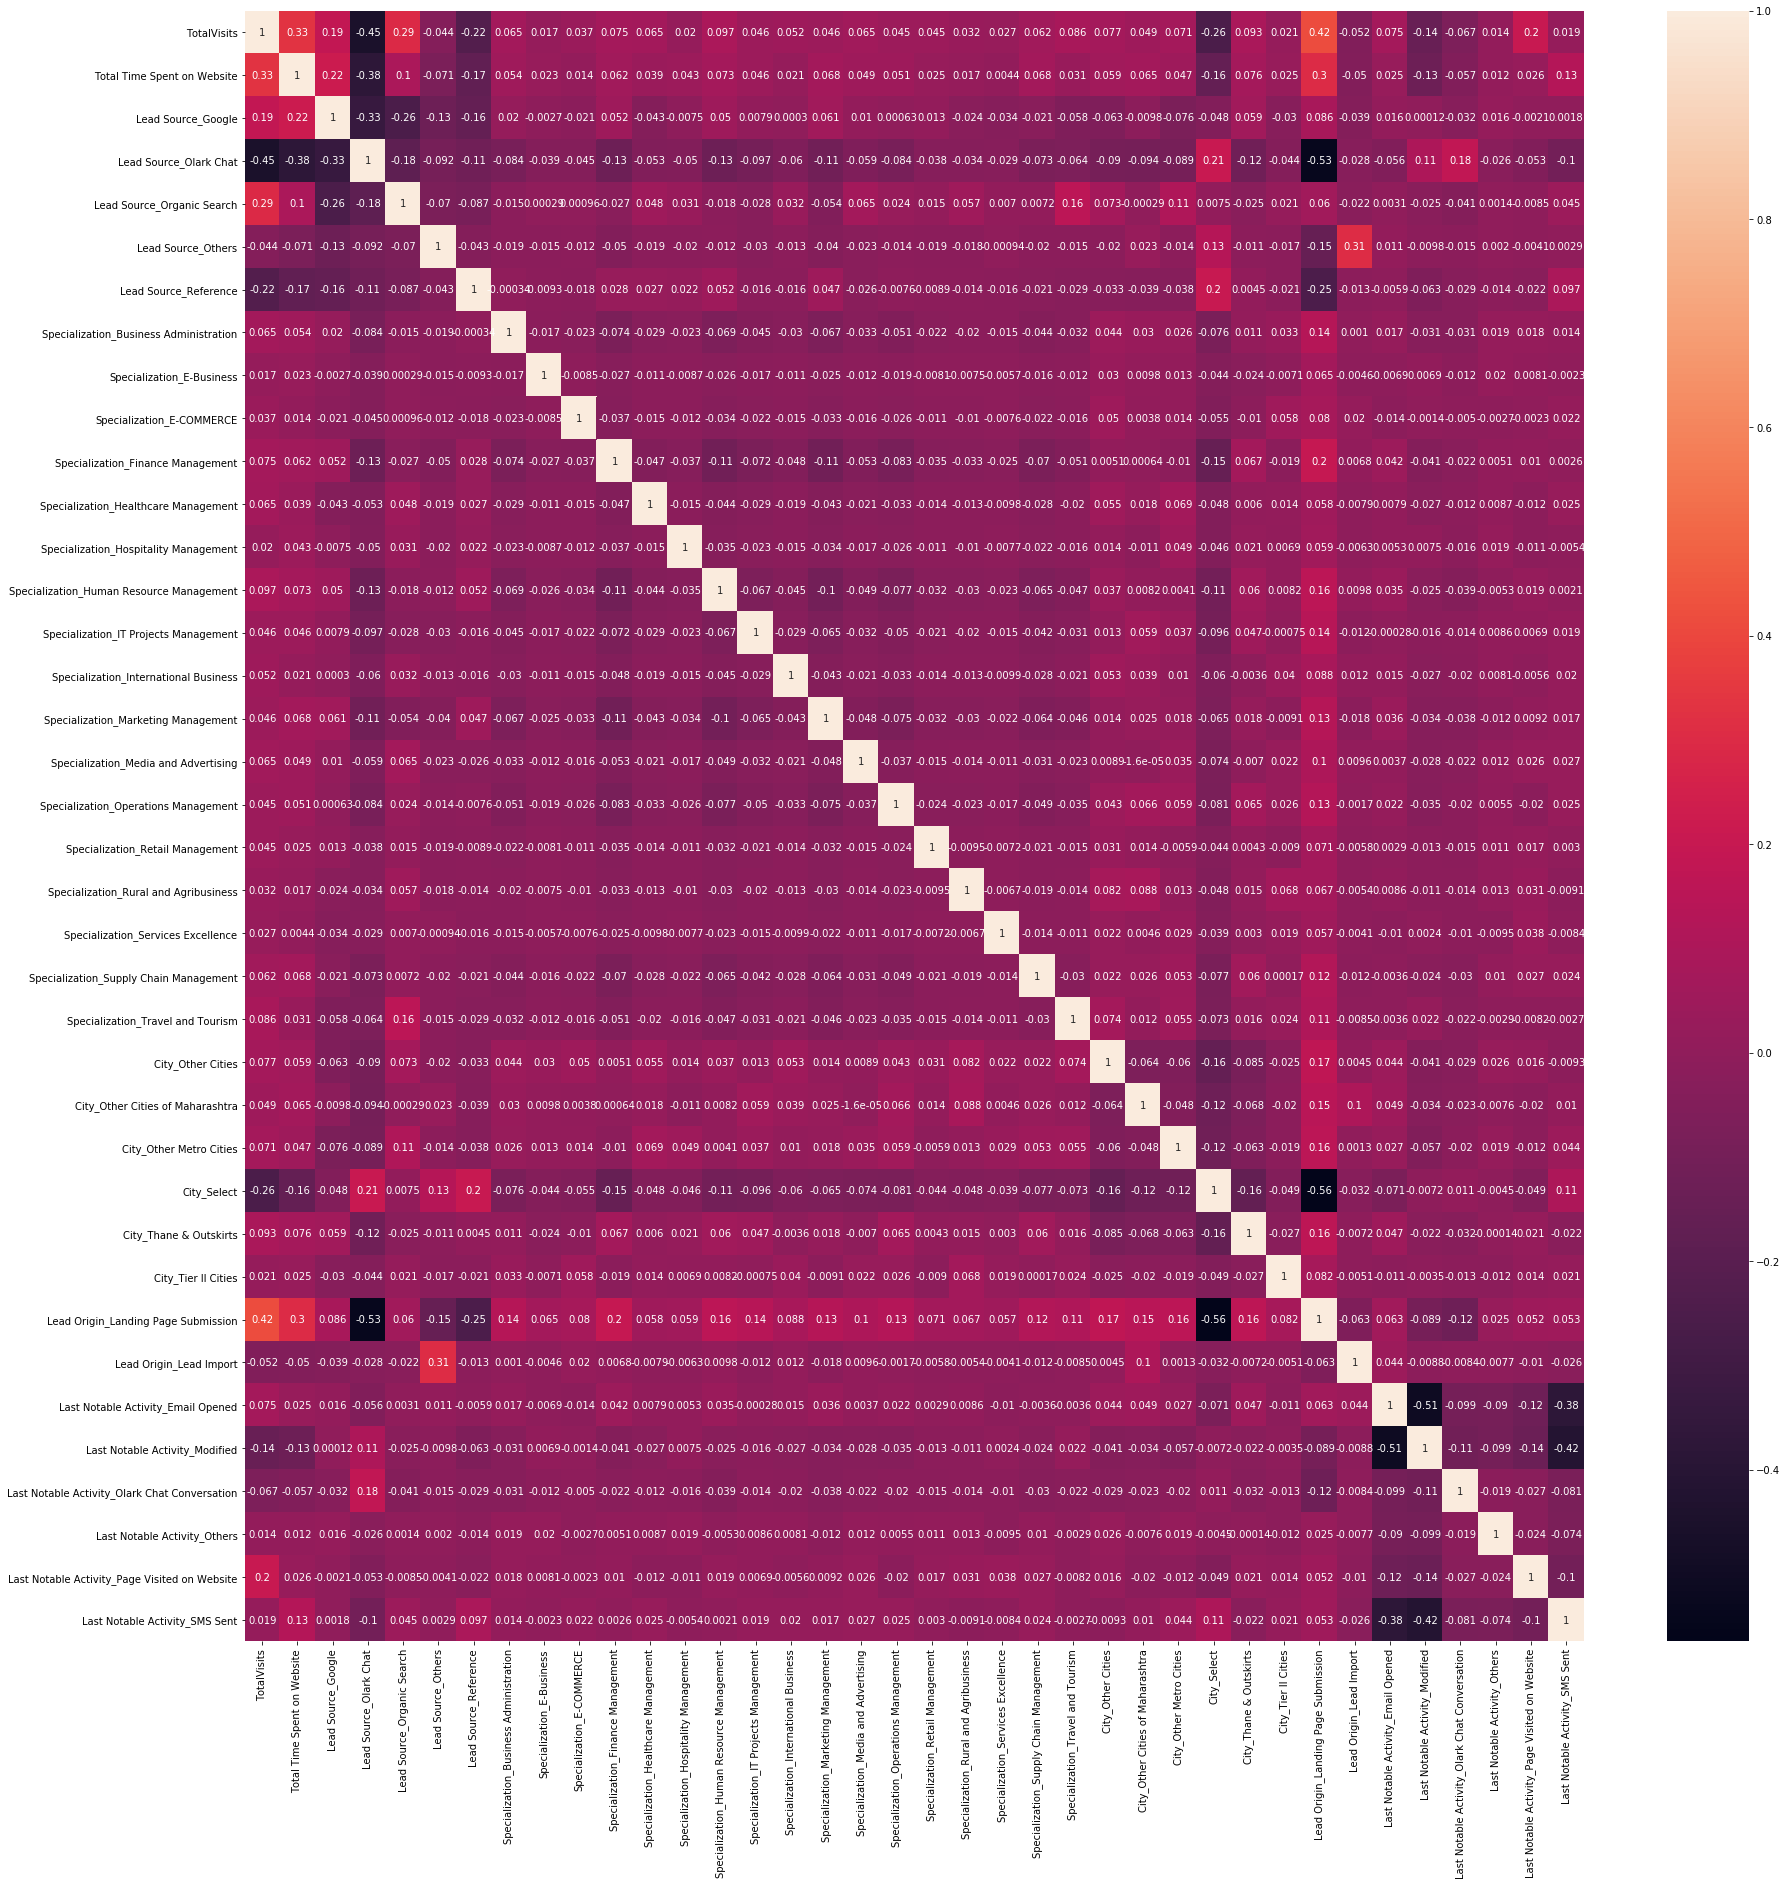

In [82]:
#Let's now look at the correlation matrix after strongly correlated columns/features are removed. 
plt.figure(figsize = (30,30))
sns.heatmap(X_train.corr(), annot = True)
plt.show()

## 2 Model Building
### 2.0 Feature Scaling

In [83]:
from sklearn.preprocessing import StandardScaler

In [84]:
scaler = StandardScaler()

X_train[['TotalVisits', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Total Time Spent on Website']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,...,City_Thane & Outskirts,City_Tier II Cities,Lead Origin_Landing Page Submission,Lead Origin_Lead Import,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
8425,-1.015121,-0.878510,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
8341,-1.015121,-0.878510,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
7376,-0.402157,-0.071940,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
7414,-1.015121,-0.878510,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3521,0.517288,1.213416,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [85]:
### Checking the lead conversion Rate
lead_conversion = (sum(leads['Converted'])/len(leads['Converted'].index))*100
lead_conversion

37.8868258178603

### 2.1 Running First Training Model

In [86]:
import statsmodels.api as sm

In [87]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6333
Model:                            GLM   Df Residuals:                     6294
Model Family:                Binomial   Df Model:                           38
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2882.7
Date:                Sun, 13 Sep 2020   Deviance:                       5765.4
Time:                        10:40:32   Pearson chi2:                 6.42e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -2.4919      0.290     -8.589      0.000      -3.061      -1.923
TotalVisits                                       0.1305      0.040      3.226      0.001       0.051       0.210
Total Time Spent on Website                       1.0753      0.039     27.677      0.000       0.999       1.151
Lead Source_Google                                0.3690      0.091      4.045      0.000       0.190       0.548
Lead Source_Olark Chat                            1.3254      0.145      9.146      0.000       1.041       1.609
Lead Source_Organic Search                        0.1556      0.120      1.292      0.196      -0.080       0.392
Lead Source_Others                                2.1652      0.197     11.011      0.000       1.780       2.551
Lead Source_Reference                             4.1537      0.253     16.422      0.000       3.658       4.649
Specialization_Business Administration            1.0709      0.181      5.914      0.000       0.716       1.426
Specialization_E-Business                         1.2690      0.424      2.996      0.003       0.439       2.099
Specialization_E-COMMERCE                         1.0477      0.333      3.144      0.002       0.395       1.701
Specialization_Finance Management                 1.2038      0.139      8.649      0.000       0.931       1.477
Specialization_Healthcare Management              1.1063      0.256      4.321      0.000       0.605       1.608
Specialization_Hospitality Management             0.4410      0.321      1.373      0.170      -0.189       1.071
Specialization_Human Resource Management          1.0549      0.142      7.423      0.000       0.776       1.333
Specialization_IT Projects Management             1.0122      0.191      5.304      0.000       0.638       1.386
Specialization_International Business             0.7857      0.252      3.116      0.002       0.292       1.280
Specialization_Marketing Management               1.1070      0.141      7.854      0.000       0.831       1.383
Specialization_Media and Advertising              0.8112      0.233      3.476      0.001       0.354       1.269
Specialization_Operations Management              1.0267      0.169      6.074      0.000       0.695       1.358
Specialization_Retail Management                  0.7485      0.343      2.185      0.029       0.077       1.420
Specialization_Rural and Agribusiness             1.2258      0.358      3.423      0.001       0.524       1.928
Specialization_Services Excellence                0.9314      0.489      1.905      0.057      -0.027       1.890
Specialization_Supply Chain Management            1.0856      0.187      5.809      0.000       0.719       1.452
Speci

### 2.2 Feature Selection Using RFE

In [88]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=1000)

In [89]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 12)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [90]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 22),
 ('Total Time Spent on Website', True, 1),
 ('Lead Source_Google', False, 17),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 26),
 ('Lead Source_Others', True, 1),
 ('Lead Source_Reference', True, 1),
 ('Specialization_Business Administration', False, 4),
 ('Specialization_E-Business', False, 5),
 ('Specialization_E-COMMERCE', False, 10),
 ('Specialization_Finance Management', True, 1),
 ('Specialization_Healthcare Management', False, 2),
 ('Specialization_Hospitality Management', False, 16),
 ('Specialization_Human Resource Management', False, 3),
 ('Specialization_IT Projects Management', False, 9),
 ('Specialization_International Business', False, 12),
 ('Specialization_Marketing Management', True, 1),
 ('Specialization_Media and Advertising', False, 11),
 ('Specialization_Operations Management', False, 6),
 ('Specialization_Retail Management', False, 13),
 ('Specialization_Rural and Agribusiness', True, 1),
 ('Specializati

In [91]:
required_col = X_train.columns[rfe.support_]

In [92]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Lead Source_Google', 'Lead Source_Organic Search',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Retail Management',
       'Specialization_Services Excellence',
       'Specialization_Supply Chain Management',
       'Specialization_Travel and Tourism', 'City_Other Cities',
       'City_Other Cities of Maharashtra', 'City_Other Metro Cities',
       'City_Select', 'City_Thane & Outskirts', 'City_Tier II Cities',
       'Lead Origin_Lead Import', 'Last Notable Activity_Modified',
       'Last Notable Activity_Page Visited on Website'],
      dtype='ob

In [93]:
X_train_sm = sm.add_constant(X_train[required_col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6333
Model:                            GLM   Df Residuals:                     6320
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2960.7
Date:                Sun, 13 Sep 2020   Deviance:                       5921.4
Time:                        10:40:33   Pearson chi2:                 6.65e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.7059      0.088    -19.288      0.000      -1.879      -1.533
Total Time Spent on Website                       1.1071      0.038     28.898      0.000       1.032       1.182
Lead Source_Olark Chat                            0.8143      0.113      7.190      0.000       0.592       1.036
Lead Source_Others                                1.8163      0.171     10.637      0.000       1.482       2.151
Lead Source_Reference                             4.1075      0.233     17.658      0.000       3.652       4.563
Specialization_Finance Management                 0.3971      0.107      3.700      0.000       0.187       0.607
Specialization_Marketing Management               0.3773      0.114      3.318      0.001       0.154       0.600
Specialization_Rural and Agribusiness             0.5354      0.335      1.596      0.111      -0.122       1.193
Lead Origin_Landing Page Submission              -0.3749      0.088     -4.247      0.000      -0.548      -0.202
Last Notable Activity_Email Opened                0.8372      0.078     10.780      0.000       0.685       0.989
Last Notable Activity_Olark Chat Conversation    -0.8108      0.312     -2.598      0.009      -1.422      -0.199
Last Notable Activity_Others                      0.9115      0.234      3.899      0.000       0.453       1.370
Last Notable Activity_SMS Sent                    2.1801      0.086     25.462      0.000       2.012       2.348
=================================================================================================================
"""

In [94]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

8425    0.263635
8341    0.263635
7376    0.210273
7414    0.134200
3521    0.862923
6623    0.134200
4651    0.486389
1240    0.134200
7692    0.578290
7473    0.379881
dtype: float64

In [95]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.2636346 , 0.2636346 , 0.2102733 , 0.13420036, 0.86292312,
       0.13420036, 0.48638926, 0.13420036, 0.57829004, 0.37988091])

In [96]:
y_train_pred_final = pd.DataFrame({'Leads_Conv':y_train.values, 'Leads_Conv_Prob':y_train_pred})
y_train_pred_final['Lead_ID'] = y_train.index
y_train_pred_final.head()

,Leads_Conv,Leads_Conv_Prob,Lead_ID
0,0,0.263635,8425
1,0,0.263635,8341
2,0,0.210273,7376
3,0,0.134200,7414
4,1,0.862923,3521


In [97]:
y_train_pred_final['predicted'] = y_train_pred_final.Leads_Conv_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Leads_Conv,Leads_Conv_Prob,Lead_ID,predicted
0,0,0.263635,8425,0
1,0,0.263635,8341,0
2,0,0.210273,7376,0
3,0,0.134200,7414,0
4,1,0.862923,3521,1


In [98]:
from sklearn import metrics

In [99]:
# Let's check the overall accuracy.
print(round(metrics.accuracy_score(y_train_pred_final.Leads_Conv, y_train_pred_final.predicted)*100))

79.0


In [100]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [101]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[required_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[required_col].values, i) for i in range(X_train[required_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Lead Origin_Landing Page Submission,2.00
8,Last Notable Activity_Email Opened,1.56
11,Last Notable Activity_SMS Sent,1.47
1,Lead Source_Olark Chat,1.39
0,Total Time Spent on Website,1.28
4,Specialization_Finance Management,1.20
3,Lead Source_Reference,1.18
5,Specialization_Marketing Management,1.15
9,Last Notable Activity_Olark Chat Conversation,1.07
2,Lead Source_Others,1.05


In [102]:
# Drop Specialization_Media and Advertising since it has a high p value = 0.11
required_col = required_col.drop('Specialization_Rural and Agribusiness')
required_col

Index(['Total Time Spent on Website', 'Lead Source_Olark Chat',
       'Lead Source_Others', 'Lead Source_Reference',
       'Specialization_Finance Management',
       'Specialization_Marketing Management',
       'Lead Origin_Landing Page Submission',
       'Last Notable Activity_Email Opened',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Others', 'Last Notable Activity_SMS Sent'],
      dtype='object')

In [103]:
X_train_sm = sm.add_constant(X_train[required_col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6333
Model:                            GLM   Df Residuals:                     6321
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2961.9
Date:                Sun, 13 Sep 2020   Deviance:                       5923.8
Time:                        10:40:33   Pearson chi2:                 6.65e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.7027      0.088    -19.265      0.000      -1.876      -1.529
Total Time Spent on Website                       1.1068      0.038     28.894      0.000       1.032       1.182
Lead Source_Olark Chat                            0.8140      0.113      7.191      0.000       0.592       1.036
Lead Source_Others                                1.8129      0.171     10.621      0.000       1.478       2.147
Lead Source_Reference                             4.1083      0.233     17.665      0.000       3.652       4.564
Specialization_Finance Management                 0.3878      0.107      3.620      0.000       0.178       0.598
Specialization_Marketing Management               0.3686      0.114      3.246      0.001       0.146       0.591
Lead Origin_Landing Page Submission              -0.3668      0.088     -4.165      0.000      -0.539      -0.194
Last Notable Activity_Email Opened                0.8369      0.078     10.780      0.000       0.685       0.989
Last Notable Activity_Olark Chat Conversation    -0.8135      0.312     -2.608      0.009      -1.425      -0.202
Last Notable Activity_Others                      0.9163      0.234      3.917      0.000       0.458       1.375
Last Notable Activity_SMS Sent                    2.1771      0.086     25.448      0.000       2.009       2.345
=================================================================================================================
"""

In [104]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([0.26421783, 0.26421783, 0.21211722, 0.13457606, 0.86276008,
       0.13457606, 0.48833126, 0.13457606, 0.57834417, 0.38186811])

In [105]:
y_train_pred_final = pd.DataFrame({'Leads_Conv':y_train.values, 'Leads_Conv_Prob':y_train_pred})
y_train_pred_final['Lead_ID'] = y_train.index
y_train_pred_final.head()

,Leads_Conv,Leads_Conv_Prob,Lead_ID
0,0,0.264218,8425
1,0,0.264218,8341
2,0,0.212117,7376
3,0,0.134576,7414
4,1,0.862760,3521


In [106]:
y_train_pred_final['predicted'] = y_train_pred_final.Leads_Conv_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Leads_Conv,Leads_Conv_Prob,Lead_ID,predicted
0,0,0.264218,8425,0
1,0,0.264218,8341,0
2,0,0.212117,7376,0
3,0,0.134576,7414,0
4,1,0.862760,3521,1


In [107]:
# Let's check the overall accuracy.
print(round(metrics.accuracy_score(y_train_pred_final.Leads_Conv, y_train_pred_final.predicted)*100))

79.0


In [108]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[required_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[required_col].values, i) for i in range(X_train[required_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Lead Origin_Landing Page Submission,1.98
7,Last Notable Activity_Email Opened,1.56
10,Last Notable Activity_SMS Sent,1.47
1,Lead Source_Olark Chat,1.39
0,Total Time Spent on Website,1.28
4,Specialization_Finance Management,1.20
3,Lead Source_Reference,1.18
5,Specialization_Marketing Management,1.15
8,Last Notable Activity_Olark Chat Conversation,1.07
2,Lead Source_Others,1.05


In [109]:
#All the VIFs <=2, within the threshold of 5. 
#P-values <= Level of confidence 5% are under thresholds . We will not be eliminating any columns further

### 2.3 Model Evaluation - Plotting the ROC Curve

In [110]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Leads_Conv, y_train_pred_final.predicted )
print(confusion)

[[3440  499]
 [ 859 1535]]


In [111]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [112]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.641186299081036

In [156]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [157]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Leads_Conv, y_train_pred_final.Leads_Conv_Prob, drop_intermediate = False )

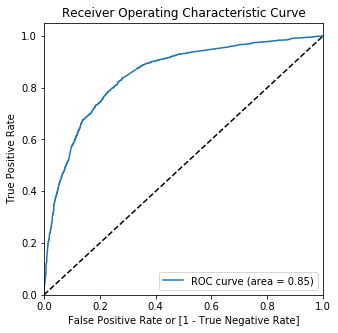

In [158]:
draw_roc(y_train_pred_final.Leads_Conv, y_train_pred_final.Leads_Conv_Prob)

### 2.4 Determine Optimal Cutoff
###### Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [116]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Leads_Conv_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Leads_Conv,Leads_Conv_Prob,Lead_ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.264218,8425,0,1,1,1,0,0,0,0,0,0,0
1,0,0.264218,8341,0,1,1,1,0,0,0,0,0,0,0
2,0,0.212117,7376,0,1,1,1,0,0,0,0,0,0,0
3,0,0.134576,7414,0,1,1,0,0,0,0,0,0,0,0
4,1,0.862760,3521,1,1,1,1,1,1,1,1,1,1,0


In [117]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Leads_Conv, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.378020  1.000000  0.000000
0.1   0.1  0.514922  0.975355  0.235085
0.2   0.2  0.717354  0.901420  0.605484
0.3   0.3  0.766935  0.811195  0.740036
0.4   0.4  0.780673  0.738095  0.806550
0.5   0.5  0.785568  0.641186  0.873318
0.6   0.6  0.762988  0.505430  0.919523
0.7   0.7  0.750355  0.427736  0.946433
0.8   0.8  0.720038  0.310777  0.968774
0.9   0.9  0.679141  0.170426  0.988322


In [118]:
#cutoff_df.to_csv('cutoffs.csv')

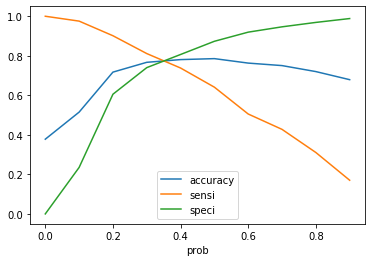

In [119]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, ~0.3 is the optimum point to take it as a cutoff probability

In [120]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Leads_Conv_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Leads_Conv,Leads_Conv_Prob,Lead_ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.264218,8425,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.264218,8341,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.212117,7376,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.134576,7414,0,1,1,0,0,0,0,0,0,0,0,0
4,1,0.862760,3521,1,1,1,1,1,1,1,1,1,1,0,1


In [121]:
# Let's check the overall accuracy.
round(metrics.accuracy_score(y_train_pred_final.Leads_Conv, y_train_pred_final.final_predicted)*100,0)

77.0

In [122]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Leads_Conv, y_train_pred_final.final_predicted )
confusion2

array([[2915, 1024],
       [ 452, 1942]], dtype=int64)

In [123]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [153]:
# Let's see the sensitivity of our logistic regression model
round(TP / float(TP+FN)*100,0)

80.0

In [154]:
y_train_pred_final['Lead Score'] = round(y_train_pred_final['Leads_Conv_Prob']*100, 0)
y_train_pred_final.head()

,Leads_Conv,Leads_Conv_Prob,Lead_ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead Score
0,0,0.264218,8425,0,1,1,1,0,0,0,0,0,0,0,0,26.0
1,0,0.264218,8341,0,1,1,1,0,0,0,0,0,0,0,0,26.0
2,0,0.212117,7376,0,1,1,1,0,0,0,0,0,0,0,0,21.0
3,0,0.134576,7414,0,1,1,0,0,0,0,0,0,0,0,0,13.0
4,1,0.862760,3521,1,1,1,1,1,1,1,1,1,1,0,1,86.0


### Precision and recall tradeoff

In [125]:
from sklearn.metrics import precision_recall_curve

In [126]:
y_train_pred_final.Leads_Conv, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       0
 4       1
        ..
 6328    0
 6329    1
 6330    0
 6331    1
 6332    1
 Name: Leads_Conv, Length: 6333, dtype: int64,
 0       0
 1       0
 2       0
 3       0
 4       1
        ..
 6328    0
 6329    0
 6330    0
 6331    1
 6332    1
 Name: predicted, Length: 6333, dtype: int64)

In [127]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Leads_Conv, y_train_pred_final.Leads_Conv_Prob)

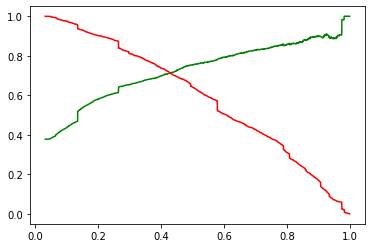

In [128]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### 2.5 Making predictions on the test set

In [129]:
X_test[['TotalVisits', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Total Time Spent on Website']])

In [130]:
X_test = X_test[required_col]
X_test.head()

,Total Time Spent on Website,Lead Source_Olark Chat,Lead Source_Others,Lead Source_Reference,Specialization_Finance Management,Specialization_Marketing Management,Lead Origin_Landing Page Submission,Last Notable Activity_Email Opened,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_SMS Sent
4462,-0.878510,1,0,0,0,0,0,0,0,0,1
5243,-0.582031,0,0,0,0,0,0,0,0,0,0
4597,-0.086672,0,0,0,0,0,1,0,0,0,0
4680,-0.878510,0,1,0,0,0,0,0,0,0,1
5355,-0.878510,1,0,0,0,0,0,0,0,0,0


In [131]:
X_test_sm = sm.add_constant(X_test)

In [132]:
y_test_pred = res.predict(X_test_sm)

In [133]:
y_test_pred[:10]

4462    0.578344
5243    0.087312
4597    0.102897
4680    0.788335
5355    0.134576
7071    0.107859
6314    0.984539
2688    0.788335
6228    0.120888
3014    0.097974
dtype: float64

In [134]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [135]:
# Let's see the head
y_pred_1.head()

,0
4462,0.578344
5243,0.087312
4597,0.102897
4680,0.788335
5355,0.134576


In [136]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [137]:
# Putting CustID to index
y_test_df['Lead_ID'] = y_test_df.index

In [138]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [139]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [140]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Leads_Conv_Prob'})

In [141]:
# Rearranging the columns
#y_pred_final = y_pred_final.reindex(['Lead_ID','Leads_Conv','Leads_Conv_Prob'], axis=1)

In [142]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Converted,Lead_ID,Leads_Conv_Prob
0,1,4462,0.578344
1,0,5243,0.087312
2,1,4597,0.102897
3,1,4680,0.788335
4,0,5355,0.134576


In [143]:
y_pred_final['final_predicted'] = y_pred_final.Leads_Conv_Prob.map(lambda x: 1 if x > 0.3 else 0)

In [144]:
y_pred_final.head()

,Converted,Lead_ID,Leads_Conv_Prob,final_predicted
0,1,4462,0.578344,1
1,0,5243,0.087312,0
2,1,4597,0.102897,0
3,1,4680,0.788335,1
4,0,5355,0.134576,0


In [145]:
# Let's check the overall accuracy.
round(metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)*100,0)

76.0

In [146]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1243,  438],
       [ 204,  830]], dtype=int64)

In [147]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [148]:
# Let's see the sensitivity of our logistic regression model
round(TP / float(TP+FN)*100,0)

80.0

In [152]:
#Finally assigning a score based on probability for each lead
y_pred_final['Lead Score'] = round(y_pred_final['Leads_Conv_Prob']*100, 0)
y_pred_final.head()

,Converted,Lead_ID,Leads_Conv_Prob,final_predicted,Lead Score
0,1,4462,0.578344,1,58.0
1,0,5243,0.087312,0,9.0
2,1,4597,0.102897,0,10.0
3,1,4680,0.788335,1,79.0
4,0,5355,0.134576,0,13.0


#### The Final Model

In [159]:
'''
Lead Conversion =  -1.7027 +  Lead Source_Reference*4.1083 + 
Last Notable Activity_SMS Sent*2.1771 +  Lead Source_Others*1.8129 + 
Total Time Spent on Website*1.1068 +  Last Notable Activity_Others*0.9163 + 
Last Notable Activity_Email Opened*0.8369 +  Lead Source_Olark Chat*0.814 + 
Specialization_Finance Management*0.3878 + 
Specialization_Marketing Management*0.3686 +  Lead Origin_Landing Page Submission*-0.3668 +  
Last Notable Activity_Olark Chat Conversation*-0.8135
'''

'\nLead Conversion =  -1.7027 +  Lead Source_Reference*4.1083 + \nLast Notable Activity_SMS Sent*2.1771 +  Lead Source_Others*1.8129 + \nTotal Time Spent on Website*1.1068 +  Last Notable Activity_Others*0.9163 + \nLast Notable Activity_Email Opened*0.8369 +  Lead Source_Olark Chat*0.814 + \nSpecialization_Finance Management*0.3878 + \nSpecialization_Marketing Management*0.3686 +  Lead Origin_Landing Page Submission*-0.3668 +  \nLast Notable Activity_Olark Chat Conversation*-0.8135\n'